## Distanced Based Statistics for Planar Point Patterns

**Author: Serge Rey** <sjsrey@gmail.com>

In [1]:
import scipy.spatial
import pysal as ps
import numpy as np
from pointpattern import PointPattern
from process import PoissonPointProcess as csr
from window import as_window
from distance_statistics import G, F, J, K, L
from distance_statistics import Genv, Fenv, Jenv, Kenv, Lenv
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:

points = [[66.22, 32.54], [22.52, 22.39], [31.01, 81.21],
          [9.47, 31.02],  [30.78, 60.10], [75.21, 58.93],
          [79.26,  7.68], [8.23, 39.93],  [98.73, 77.17],
          [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]]
p1 = PointPattern(points)

In [3]:
p1.summary()

Point Pattern
12 points
Bounding rectangle [(8.23,7.68), (98.73,92.08)]
Area of window: 7638.2
Intensity estimate for window: 0.00157105077112
       x      y
0  66.22  32.54
1  22.52  22.39
2  31.01  81.21
3   9.47  31.02
4  30.78  60.10


In [4]:
p1.knn()

(array([[ 9],
        [ 3],
        [ 4],
        [ 7],
        [ 2],
        [ 9],
        [11],
        [ 3],
        [ 5],
        [ 5],
        [ 5],
        [ 6]]), array([[ 25.59050019],
        [ 15.64542745],
        [ 21.11125292],
        [  8.99587128],
        [ 21.11125292],
        [ 21.93729473],
        [ 24.81289987],
        [  8.99587128],
        [ 29.76387072],
        [ 21.93729473],
        [ 34.63124168],
        [ 24.81289987]]))

In [5]:
p1.knn(2)

(array([[ 9, 11],
        [ 3,  7],
        [ 4, 10],
        [ 7,  1],
        [ 2,  7],
        [ 9,  0],
        [11,  0],
        [ 3,  1],
        [ 5,  9],
        [ 5,  0],
        [ 5,  2],
        [ 6,  0]]), array([[ 25.59050019,  26.78023898],
        [ 15.64542745,  22.62422816],
        [ 21.11125292,  35.86682729],
        [  8.99587128,  15.64542745],
        [ 21.11125292,  30.2544443 ],
        [ 21.93729473,  27.87924317],
        [ 24.81289987,  28.07242775],
        [  8.99587128,  22.62422816],
        [ 29.76387072,  35.77753625],
        [ 21.93729473,  25.59050019],
        [ 34.63124168,  35.86682729],
        [ 24.81289987,  26.78023898]]))

In [6]:
p1.max_nnd

34.63124167568931

In [7]:
p1.min_nnd

8.9958712752017522

In [8]:
p1.mean_nnd

21.612139802089246

In [9]:
p1.nnd

array([[ 25.59050019],
       [ 15.64542745],
       [ 21.11125292],
       [  8.99587128],
       [ 21.11125292],
       [ 21.93729473],
       [ 24.81289987],
       [  8.99587128],
       [ 29.76387072],
       [ 21.93729473],
       [ 34.63124168],
       [ 24.81289987]])

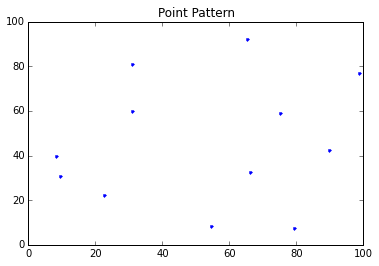

In [10]:
p1.plot()

array([  0.        ,   1.73156208,   3.46312417,   5.19468625,
         6.92624834,   8.65781042,  10.3893725 ,  12.12093459,
        13.85249667,  15.58405875,  17.31562084,  19.04718292,
        20.77874501,  22.51030709,  24.24186917,  25.97343126,
        27.70499334,  29.43655542,  31.16811751,  32.89967959,
        34.63124168,  36.36280376])

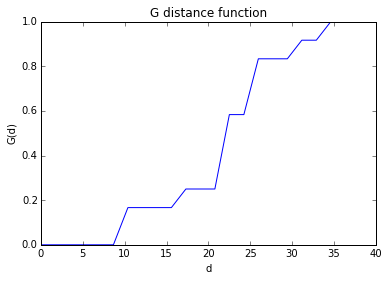

In [11]:
gp1 = G(p1, intervals=20)
gp1.plot()
gp1.G
gp1.d

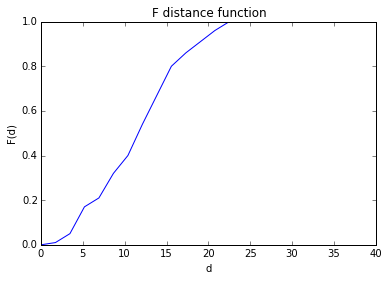

In [12]:
fp1 = F(p1, intervals=20)
fp1.plot()

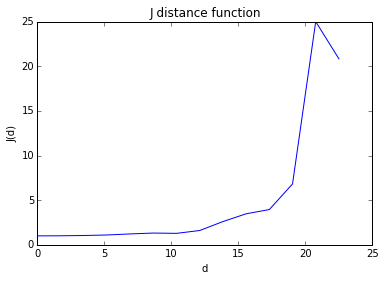

In [13]:
jp1 = J(p1, intervals=20)
jp1.plot()

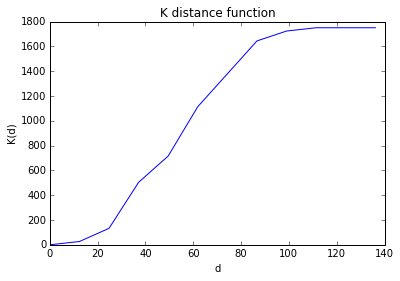

In [14]:
kp1 = K(p1)

kp1.plot()

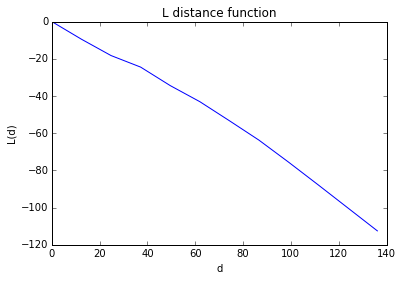

In [15]:
lp1 = L(p1)
lp1.plot()

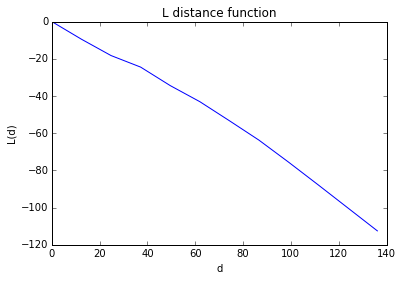

In [16]:
lp1 = L(p1)
lp1.plot()

## Simulation Envelopes

In [17]:
realizations = csr(p1.window, p1.n, 100, asPP=True)
genv = Genv(p1, intervals=20, realizations=realizations)

(100, 22, 2)


In [18]:
genv.observed

array([[  0.        ,   0.        ],
       [  1.73156208,   0.        ],
       [  3.46312417,   0.        ],
       [  5.19468625,   0.        ],
       [  6.92624834,   0.        ],
       [  8.65781042,   0.        ],
       [ 10.3893725 ,   0.16666667],
       [ 12.12093459,   0.16666667],
       [ 13.85249667,   0.16666667],
       [ 15.58405875,   0.16666667],
       [ 17.31562084,   0.25      ],
       [ 19.04718292,   0.25      ],
       [ 20.77874501,   0.25      ],
       [ 22.51030709,   0.58333333],
       [ 24.24186917,   0.58333333],
       [ 25.97343126,   0.83333333],
       [ 27.70499334,   0.83333333],
       [ 29.43655542,   0.83333333],
       [ 31.16811751,   0.91666667],
       [ 32.89967959,   0.91666667],
       [ 34.63124168,   1.        ],
       [ 36.36280376,   1.        ]])

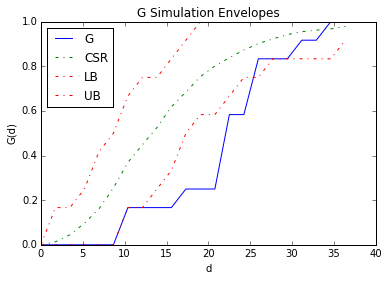

In [19]:
genv.plot()

(100, 22, 2)


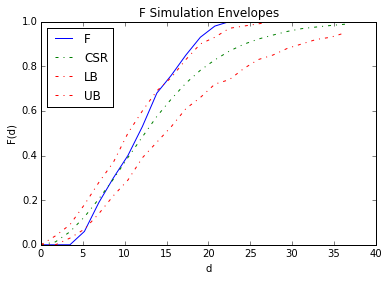

In [20]:
fenv = Fenv(p1, intervals=20, realizations=realizations)
fenv.plot()

(100, 14, 2)


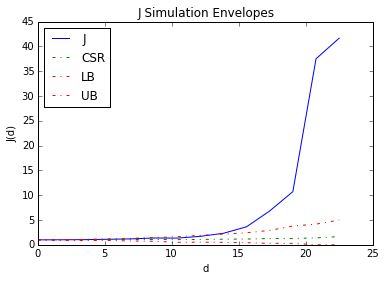

In [21]:
jenv = Jenv(p1, intervals=20, realizations=realizations)
jenv.plot()

(100, 22, 2)


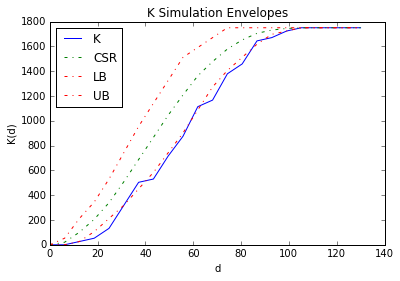

In [22]:
kenv = Kenv(p1, intervals=20, realizations=realizations)
kenv.plot()

(100, 22, 2)


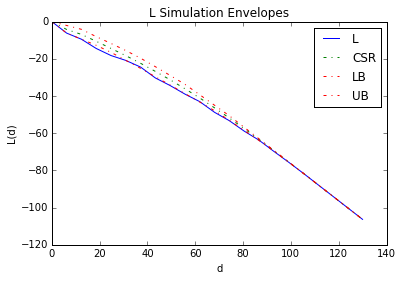

In [23]:
lenv = Lenv(p1, intervals=20, realizations=realizations)
lenv.plot()

## Virgina UTM N17 Example


In [24]:
from pysal.contrib import shapely_ext
va = ps.open(ps.examples.get_path("vautm17n.shp"))
polys = [shp for shp in va]
state = shapely_ext.cascaded_union(polys)

In [25]:
pp = csr(as_window(state), 100, 1, asPP=True).realizations[0]

/Users/serge/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


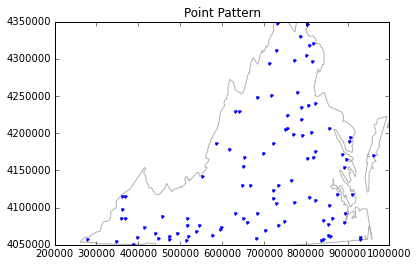

In [26]:
pp.plot(window=True)

In [27]:
# G function using mbb
pp_bb = PointPattern(pp.points)


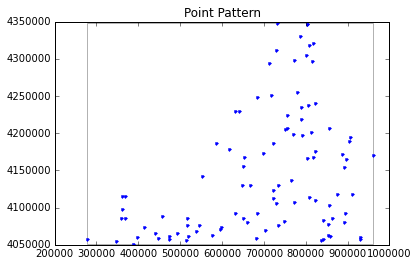

In [28]:
pp_bb.plot(window=True)

In [29]:
# csr in bb
csrs = csr(pp_bb.window, 100, 100, asPP=True)

(100, 12, 2)


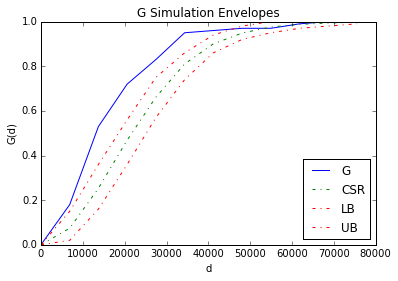

In [30]:
genv_bb = Genv(pp_bb, realizations=csrs)
genv_bb.plot()

(100, 12, 2)


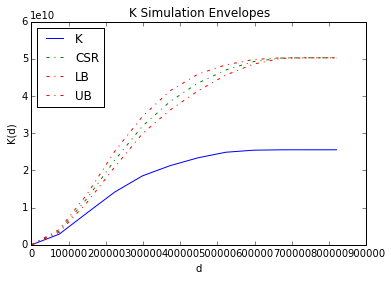

In [31]:
kenv = Kenv(pp, realizations=csrs)
kenv.plot()

(100, 12, 2)


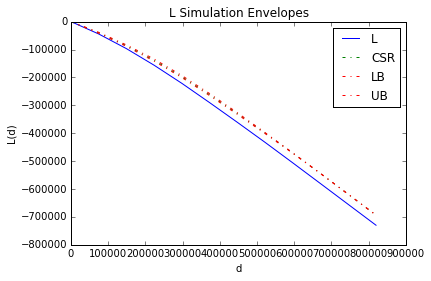

In [32]:
lenv = Lenv(pp, realizations=csrs)
lenv.plot()

In [33]:
# now csr in state window
csrsw = csr(as_window(state), 100, 100, asPP=True)

(100, 12, 2)


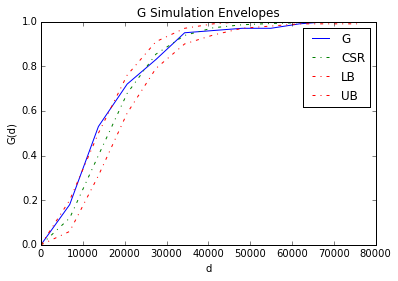

In [34]:
genv = Genv(pp, realizations=csrsw)
genv.plot()

(100, 12, 2)


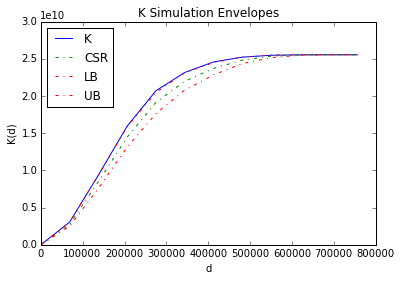

In [35]:
kenv = Kenv(pp, realizations=csrsw)
kenv.plot()

(100, 12, 2)


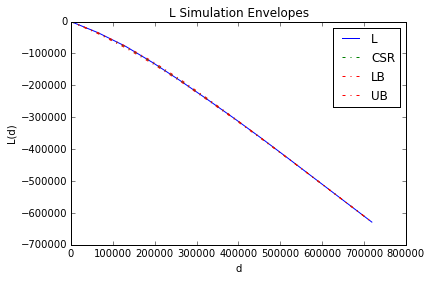

In [30]:
lenv = Lenv(pp, realizations=csrsw)
lenv.plot()